In [ ]:
# Suzanne

# Preliminary stuff

## Import Libraries

The main libraries used are numpy and pandas for data handling and [scikit learn (sklearn)](https://scikit-learn.org/stable/) for classification models. 

In [ ]:
import matplotlib.pyplot as plt # plotting library
import seaborn as sns    # a data visualization library

import numpy as np # library for numerical calculations
import pandas as pd # library for reading csv files

## Load data

Remember to first load the data into this workspace.

In [ ]:
master = pd.read_csv('master.csv') # loading dataset
survey = pd.read_csv('survey.csv')
song_metrics = pd.read_csv('song_metrics.csv')
songs_only = pd.read_csv('songs_only.csv')

# remove NA entries
master = master.dropna()

master.head() # check if it's loaded correctly

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,song2,song3,trauma,id,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,Trust Nobody Selena Gomez Tory Lanez Cashmere Cat,Don't Wanna Know Maroon5 Kendrick Lamar,No,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,05/11/2016 14:45:26,Male,18 - 30,1 - 2,6,6,3,5,5,Put that on my set asap rocky ft skepta,High rhe beach lana del rey,New level asap ferg,No,1,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,05/11/2016 14:45:41,Female,18 - 30,0 - 1,5,5,4,4,5,Fireproof Coleman Hell,Love on the Brain Rhianna,This Girl Kungs vs Cookin' on 3 Burners,No,2,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,05/11/2016 14:45:55,Male,18 - 30,2+,3,6,5,5,5,Eyes Nose Lips TaeYang,Me Like Yuh Jay Park,Aquaman Jay Park,No,3,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,05/11/2016 14:49:15,Female,18 - 30,0 - 1,2,5,2,1,5,Sugar Wanderlust,Blue Jeans Lana Del Ray,Mr. Bright side the killers,Yes,4,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


# Data Visualization

In [ ]:
# set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})       # holds for all following figures unless changed

# set color palette
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Mental health distribution per trauma

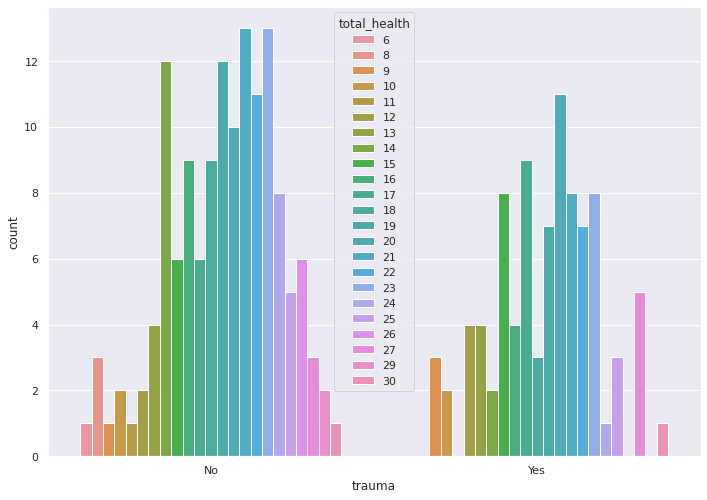

In [ ]:
#breakdown by trauma and health
sns.countplot(x="trauma", 
              hue="total_health", 
              data=master 
              );

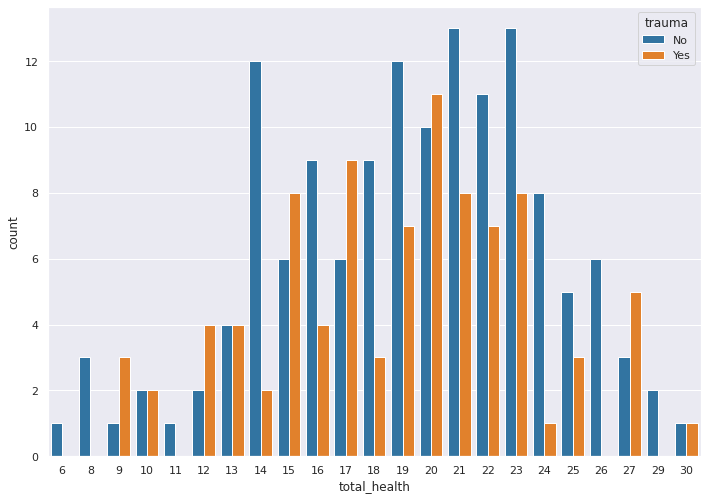

In [ ]:
#breakdown by trauma and health
sns.countplot(x="total_health", 
              hue="trauma", 
              data=master,
              palette="tab10" 
              );

## Mental health distribution per gender

### Health

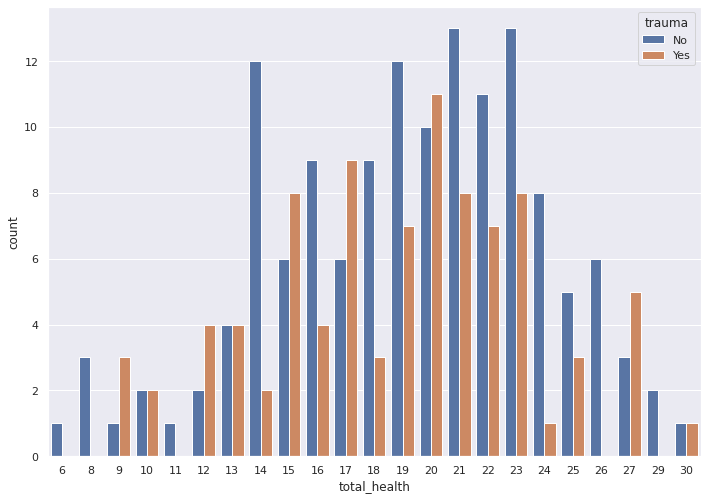

In [ ]:
#breakdown by gender and health
sns.countplot(x="total_health", 
              hue="trauma", 
              data=master 
              );

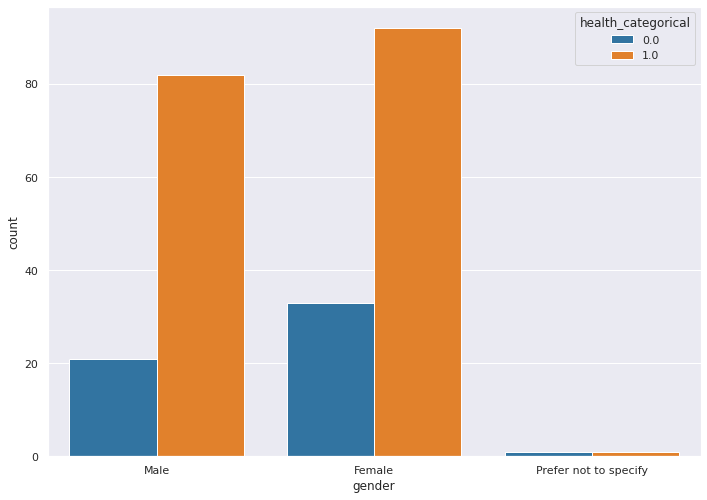

In [ ]:
#breakdown by gender and health category
sns.countplot(x="gender", 
              hue="health_categorical", 
              data=master,
              palette="tab10"
              );

### Life enjoyment

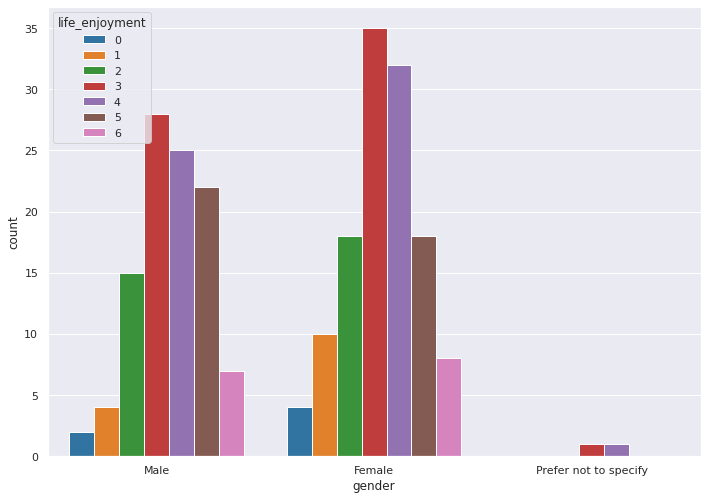

In [ ]:
#breakdown by gender and life enjoyment
sns.countplot(x="gender", 
              hue="life_enjoyment", 
              data=master,
              palette="tab10"
              );

### Resilience

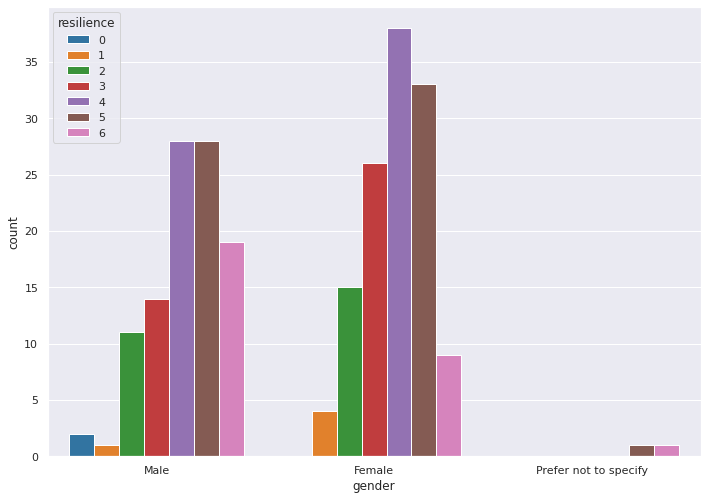

In [ ]:
#breakdown by gender and resilience
sns.countplot(x="gender", 
              hue="resilience", 
              data=master,
              palette="tab10"
              );

### Balanced life

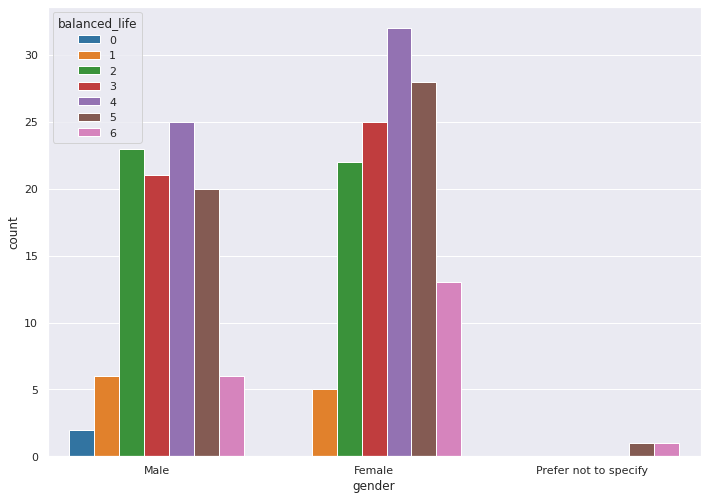

In [ ]:
#breakdown by gender and balanced life
sns.countplot(x="gender", 
              hue="balanced_life", 
              data=master,
              palette="tab10"
              );

### Emotional flex

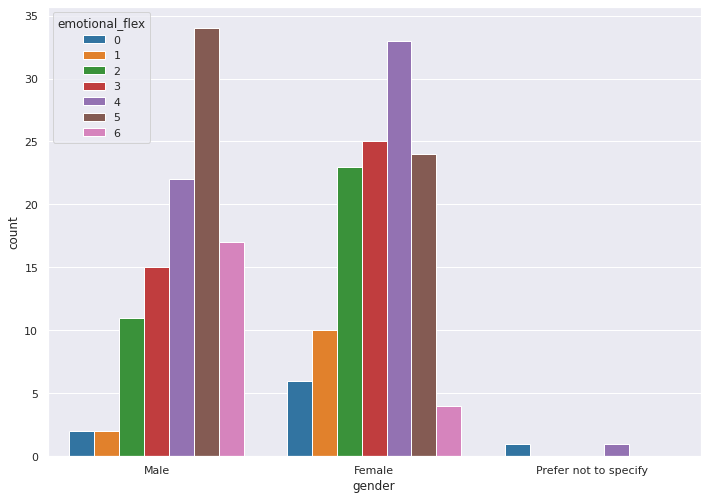

In [ ]:
#breakdown by gender and balanced life
sns.countplot(x="gender", 
              hue="emotional_flex", 
              data=master,
              palette="tab10"
              );

### Self actualization

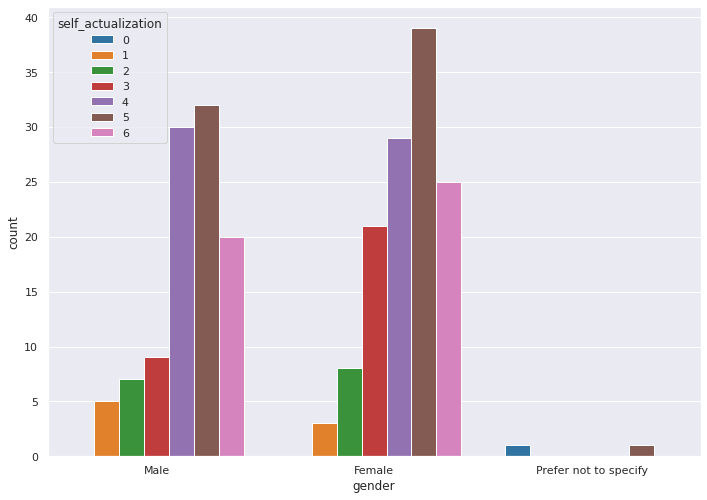

In [ ]:
#breakdown by gender and balanced life
sns.countplot(x="gender", 
              hue="self_actualization", 
              data=master,
              palette="tab10"
              );

## Mental health distribution per age group

### Health

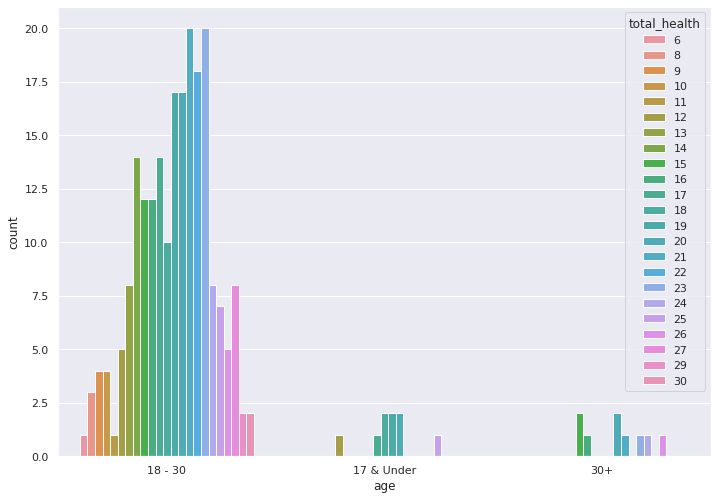

In [ ]:
#breakdown by age and health
sns.countplot(x="age", 
              hue="total_health", 
              data=master 
              );

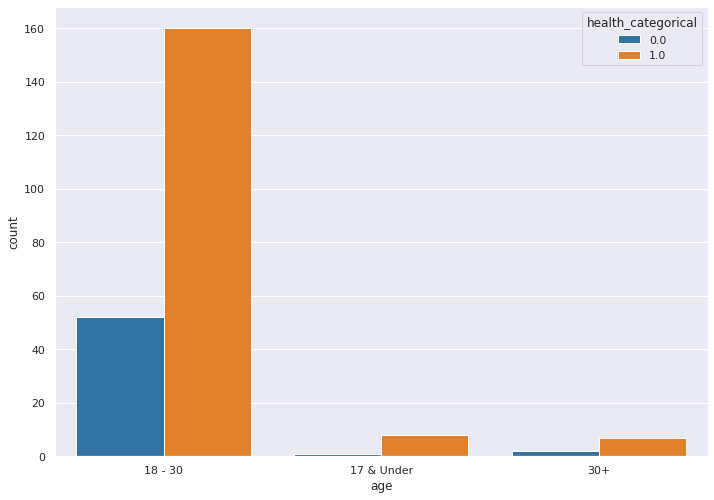

In [ ]:
#breakdown by age and health category
sns.countplot(x="age", 
              hue="health_categorical", 
              data=master,
              palette="tab10" 
              );

### Life enjoyment

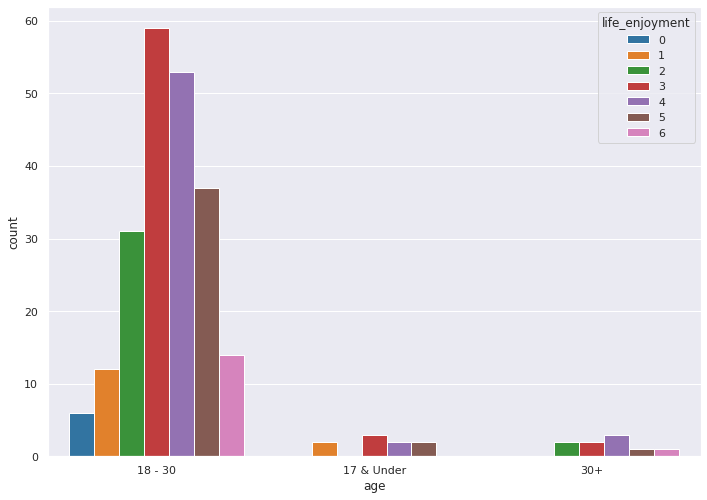

In [ ]:
#breakdown by age and life enjoyment
sns.countplot(x="age", 
              hue="life_enjoyment", 
              data=master,
              palette="tab10" 
              );

### Resilience

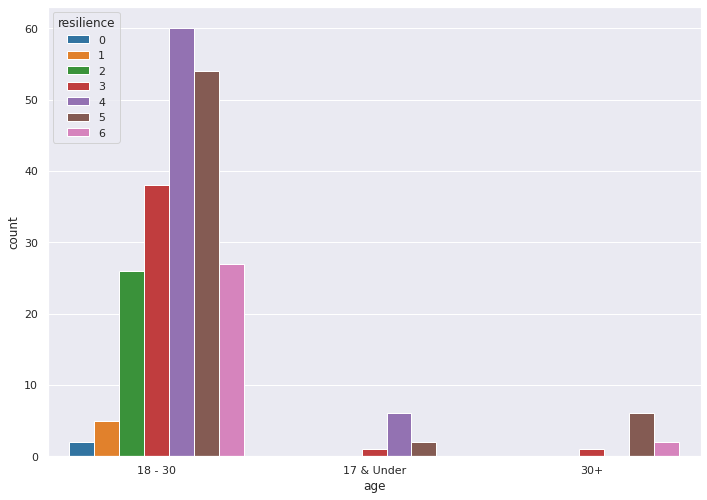

In [ ]:
#breakdown by age and resilience
sns.countplot(x="age", 
              hue="resilience", 
              data=master,
              palette="tab10"
              );

### Balanced life

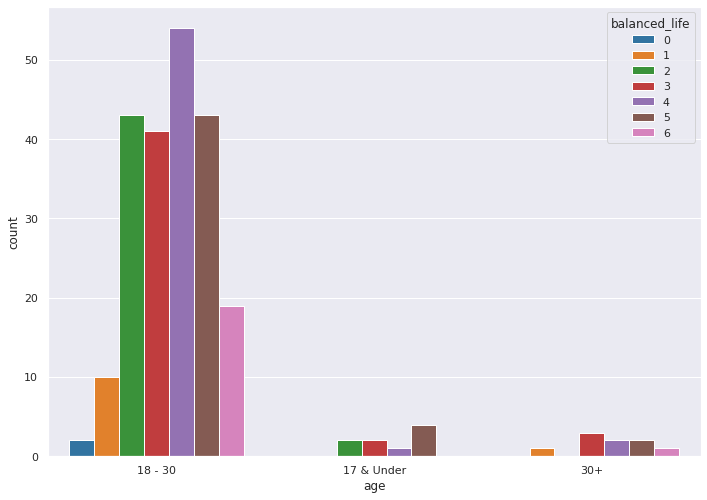

In [ ]:
#breakdown by age and balanced life
sns.countplot(x="age", 
              hue="balanced_life", 
              data=master,
              palette="tab10"
              );

### Emotional flex

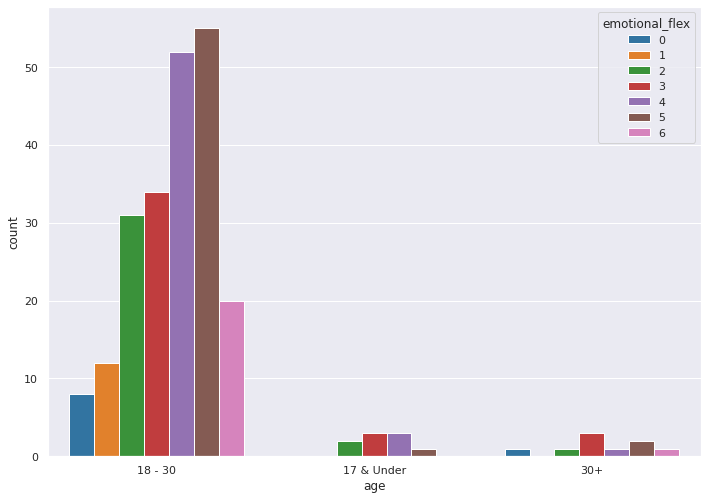

In [ ]:
#breakdown by age and balanced life
sns.countplot(x="age", 
              hue="emotional_flex", 
              data=master,
              palette="tab10"
              );

### Self actualization

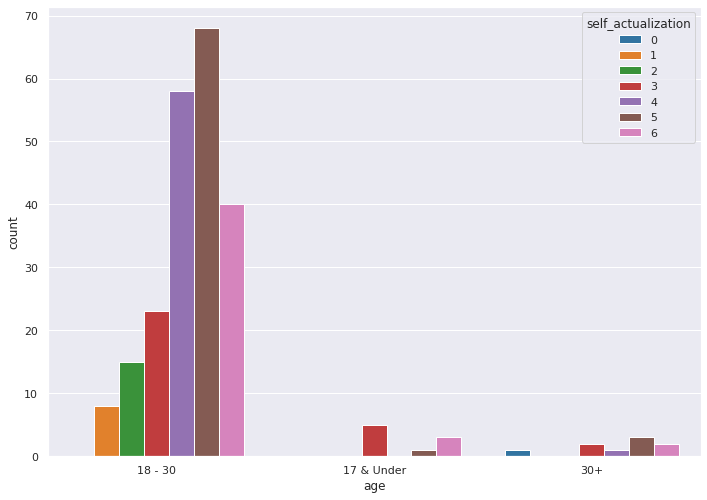

In [ ]:
#breakdown by age and self actualization
sns.countplot(x="age", 
              hue="self_actualization", 
              data=master,
              palette="tab10"
              );

## Music qualities and mental health

### Life enjoyment and music energy (per gender)

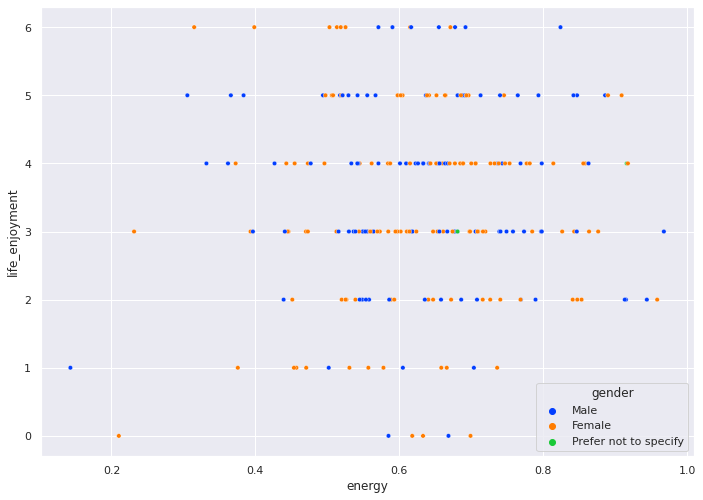

In [ ]:
sns.scatterplot(x='energy', 
           y='life_enjoyment', 
           data=master, 
           hue='gender',
           s=20,
           palette="bright"
           )

# Models

## Preprocess data

Remove unwanted columns and convert categorical variables to processable forms.

In [ ]:
# Remove unneeded columns
data = master.drop(columns=['timestamp', 'song1', 'song2', 'song3', 'id'])
data.head()


,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,Male,18 - 30,1 - 2,4,3,5,3,6,No,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,Male,18 - 30,1 - 2,6,6,3,5,5,No,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,Female,18 - 30,0 - 1,5,5,4,4,5,No,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,Male,18 - 30,2+,3,6,5,5,5,No,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,Female,18 - 30,0 - 1,2,5,2,1,5,Yes,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


In [ ]:
# Check data types
data.dtypes

# Need to change object types to integers

gender                 object
age                    object
amount_music           object
life_enjoyment          int64
resilience              int64
balanced_life           int64
emotional_flex          int64
self_actualization      int64
trauma                 object
total_health            int64
energy                float64
dance                 float64
liveness              float64
valence               float64
tempo                 float64
instrumental          float64
acoustic              float64
popularity            float64
health_categorical    float64
dtype: object

In [ ]:
# convert the data type for categorical variables
cat_data = ['gender', 'age', 'amount_music', 'trauma']

for i in cat_data:
    data[i] = pd.Categorical(data[i]);
    data[i] = data[i].cat.codes

data.dtypes

gender                   int8
age                      int8
amount_music             int8
life_enjoyment          int64
resilience              int64
balanced_life           int64
emotional_flex          int64
self_actualization      int64
trauma                   int8
total_health            int64
energy                float64
dance                 float64
liveness              float64
valence               float64
tempo                 float64
instrumental          float64
acoustic              float64
popularity            float64
health_categorical    float64
dtype: object

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


## Functions for model evaluation

In [ ]:
# function to evaluate binary model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_binary_model(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred))
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

In [ ]:
# function to evaluate multiclass model
## no AUC and ROC
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_multiclass_model(y_test, y_pred):
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

## Predict total health with non-health variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Drop unwanted variables.

In [ ]:
# exclude the indicators of mental health
to_exclude = ['health_categorical', 
              'life_enjoyment', 
              'resilience', 
              'balanced_life', 
              'emotional_flex', 
              'self_actualization']

data_1 = data.drop(columns=to_exclude)     # data_1 is the dataframe we'll use to build the model

Split data into training and test set.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('total_health',1),    # X data
                                                    data_1['total_health'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

Normalize the data.

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.04)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_multiclass_model(y_test, y_pred)   # Evaluate

[21 23 20 23 23 21 17 20 17 23 17 23 19 23 21 21 19 20 23 19 23 20 20 14
 14 21 23 23 20 20 20 19 19 20 16 23 17 23 21 19 17 23 21 20 23 23 23 23
 23 21 19 17 20 23 19 23 23 20 20 23 23 21 20 23 17 23 20 19 23]
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.14      0.25      0.18         4
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         4
          21       0.11      0.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k Nearest Neighbours (acc = 0.10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=8) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_multiclass_model(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.10      0.25      0.14         4
          15       0.50      0.20      0.29         5
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         4
          19       0.25      0.20      0.22         5
          20       0.00      0.00      0.00         4
          21       0.12      0.33      0.17         6
          22       0.25      0.25      0.25         4
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         3
          25       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict life enjoyment with non-health variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Drop unwanted variables.

In [ ]:
# exclude the indicators of mental health
to_exclude = ['health_categorical', 
              'total_health', 
              'resilience', 
              'balanced_life', 
              'emotional_flex', 
              'self_actualization']

data_1 = data.drop(columns=to_exclude)     # data_1 is the dataframe we'll use to build the model

Split data into training and test set.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('life_enjoyment',1),    # X data
                                                    data_1['life_enjoyment'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

Normalize the data.

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.25)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_multiclass_model(y_test, y_pred)   # Evaluate

[4 4 3 3 4 4 3 3 4 4 3 4 4 3 3 3 3 3 4 3 3 4 4 3 3 3 3 3 3 4 4 4 3 4 4 3 3
 4 3 3 4 3 3 3 4 4 4 4 3 3 3 3 3 4 3 4 4 3 3 4 4 3 3 4 3 3 3 3 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        12
           3       0.28      0.58      0.37        19
           4       0.21      0.46      0.29        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         4

    accuracy                           0.25        69
   macro avg       0.07      0.15      0.09        69
weighted avg       0.11      0.25      0.16        69

Confusion Matrix: 
 [[ 0  0  0  2  1  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  5  7  0  0]
 [ 0  0  0 11  8  0  0]
 [ 0  0  0  7  6  0  0]
 [ 0  0  0  7  6  0  0]
 [ 0  0  0  3  1  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k Nearest Neighbours (acc = 0.29)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_multiclass_model(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.25      0.17      0.20        12
           3       0.42      0.53      0.47        19
           4       0.23      0.54      0.32        13
           5       0.20      0.08      0.11        13
           6       0.00      0.00      0.00         4

    accuracy                           0.29        69
   macro avg       0.16      0.19      0.16        69
weighted avg       0.24      0.29      0.24        69

Confusion Matrix: 
 [[ 0  0  0  0  3  0  0]
 [ 0  0  0  4  1  0  0]
 [ 0  0  2  1  6  3  0]
 [ 0  1  2 10  6  0  0]
 [ 0  0  1  5  7  0  0]
 [ 0  0  3  3  6  1  0]
 [ 0  0  0  1  2  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict resilience with non-health variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Drop unwanted variables.

In [ ]:
# exclude the indicators of mental health
to_exclude = ['health_categorical', 
              'total_health', 
              'life_enjoyment', 
              'balanced_life', 
              'emotional_flex', 
              'self_actualization']

data_1 = data.drop(columns=to_exclude)     # data_1 is the dataframe we'll use to build the model

Split data into training and test set.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('resilience',1),    # X data
                                                    data_1['resilience'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

Normalize the data.

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.19)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_multiclass_model(y_test, y_pred)   # Evaluate

[4 5 4 5 4 4 3 5 4 5 3 4 4 5 3 4 4 4 4 4 5 4 4 5 3 3 4 5 4 5 4 4 4 4 5 5 3
 5 3 4 4 5 3 4 4 4 5 4 5 4 4 3 5 5 4 5 5 3 4 4 4 3 4 4 3 5 5 4 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         7
           4       0.25      0.53      0.34        17
           5       0.19      0.22      0.21        18
           6       0.00      0.00      0.00        11

    accuracy                           0.19        69
   macro avg       0.06      0.11      0.08        69
weighted avg       0.11      0.19      0.14        69

Confusion Matrix: 
 [[ 0  0  0  1  1  0  0]
 [ 0  0  0  1  1  0  0]
 [ 0  0  0  1 10  1  0]
 [ 0  0  0  0  5  2  0]
 [ 0  0  0  1  9  7  0]
 [ 0  0  0  8  6  4  0]
 [ 0  0  0  0  4  7  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k Nearest Neighbours (acc = 0.28)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=14) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_multiclass_model(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        12
           3       0.08      0.14      0.11         7
           4       0.27      0.76      0.40        17
           5       0.50      0.17      0.25        18
           6       0.67      0.18      0.29        11

    accuracy                           0.28        69
   macro avg       0.22      0.18      0.15        69
weighted avg       0.31      0.28      0.22        69

Confusion Matrix: 
 [[ 0  0  0  0  2  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  1 11  0  0]
 [ 0  0  0  1  4  1  1]
 [ 0  0  0  3 13  1  0]
 [ 0  0  0  6  9  3  0]
 [ 0  0  0  1  7  1  2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict balanced life with non-health variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Drop unwanted variables.

In [ ]:
# exclude the indicators of mental health
to_exclude = ['health_categorical', 
              'total_health', 
              'life_enjoyment', 
              'resilience', 
              'emotional_flex', 
              'self_actualization']

data_1 = data.drop(columns=to_exclude)     # data_1 is the dataframe we'll use to build the model
data_1.head()

,gender,age,amount_music,balanced_life,trauma,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity
0,1,1,1,5,0,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000
1,1,1,1,3,0,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000
2,0,1,0,4,0,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000
3,1,1,2,5,0,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333
4,0,1,0,2,1,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000


Split data into training and test set.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('balanced_life',1),    # X data
                                                    data_1['balanced_life'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

Normalize the data.

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.23)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_multiclass_model(y_test, y_pred)   # Evaluate

[4 5 3 2 4 4 2 4 4 4 4 2 5 4 2 3 3 2 4 5 5 4 5 4 4 4 5 5 2 4 4 4 5 5 2 2 2
 4 2 5 3 4 5 3 4 3 4 3 4 5 3 2 5 4 5 4 4 4 5 4 3 3 4 4 2 4 5 2 4]
              precision    recall  f1-score   support

           2       0.23      0.25      0.24        12
           3       0.30      0.19      0.23        16
           4       0.17      0.36      0.23        14
           5       0.31      0.33      0.32        15
           6       0.00      0.00      0.00        12

    accuracy                           0.23        69
   macro avg       0.20      0.23      0.20        69
weighted avg       0.21      0.23      0.21        69

Confusion Matrix: 
 [[3 1 6 2 0]
 [4 3 5 4 0]
 [3 3 5 3 0]
 [1 3 6 5 0]
 [2 0 8 2 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k Nearest Neighbours (acc = 0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_multiclass_model(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.25      0.33      0.29        12
           3       0.20      0.12      0.15        16
           4       0.37      0.50      0.42        14
           5       0.44      0.47      0.45        15
           6       0.50      0.08      0.14        12

    accuracy                           0.30        69
   macro avg       0.29      0.25      0.24        69
weighted avg       0.35      0.30      0.29        69

Confusion Matrix: 
 [[0 0 0 0 0 0]
 [2 4 1 1 3 1]
 [2 3 2 5 4 0]
 [0 3 2 7 2 0]
 [1 2 2 3 7 0]
 [1 4 3 3 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict emotional flex with non-health variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Drop unwanted variables.

In [ ]:
# exclude the indicators of mental health
to_exclude = ['health_categorical', 
              'total_health', 
              'life_enjoyment', 
              'resilience', 
              'balanced_life', 
              'self_actualization']

data_1 = data.drop(columns=to_exclude)     # data_1 is the dataframe we'll use to build the model

Split data into training and test set.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('emotional_flex',1),    # X data
                                                    data_1['emotional_flex'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

Normalize the data.

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.23)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_multiclass_model(y_test, y_pred)   # Evaluate

[4 5 3 5 4 3 5 5 3 4 3 5 4 5 5 5 5 4 3 5 5 4 4 5 5 3 4 5 4 4 4 4 5 5 4 5 5
 5 5 4 3 5 5 3 3 5 5 3 5 5 5 4 5 4 4 4 5 4 4 3 4 5 4 3 4 5 5 4 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        12
           3       0.25      0.25      0.25        12
           4       0.32      0.53      0.40        15
           5       0.16      0.45      0.23        11
           6       0.00      0.00      0.00        10

    accuracy                           0.23        69
   macro avg       0.10      0.18      0.13        69
weighted avg       0.14      0.23      0.17        69

Confusion Matrix: 
 [[0 0 0 1 1 2 0]
 [0 0 0 0 3 2 0]
 [0 0 0 3 5 4 0]
 [0 0 0 3 4 5 0]
 [0 0 0 1 8 6 0]
 [0 0 0 4 2 5 0]
 [0 0 0 0 2 8 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k Nearest Neighbours (acc = 0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=29) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_multiclass_model(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        12
           3       0.26      0.42      0.32        12
           4       0.43      0.60      0.50        15
           5       0.24      0.64      0.35        11
           6       0.00      0.00      0.00        10

    accuracy                           0.30        69
   macro avg       0.13      0.24      0.17        69
weighted avg       0.18      0.30      0.22        69

Confusion Matrix: 
 [[0 0 0 2 1 1 0]
 [0 0 0 1 3 1 0]
 [0 0 0 3 5 4 0]
 [0 0 0 5 2 5 0]
 [0 0 0 2 9 4 0]
 [0 0 0 4 0 7 0]
 [0 0 0 2 1 7 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict self-actualization with non-health variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Drop unwanted variables.

In [ ]:
# exclude the indicators of mental health
to_exclude = ['health_categorical', 
              'total_health', 
              'life_enjoyment', 
              'resilience', 
              'emotional_flex', 
              'balanced_life']

data_1 = data.drop(columns=to_exclude)     # data_1 is the dataframe we'll use to build the model

Split data into training and test set.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('self_actualization',1),    # X data
                                                    data_1['self_actualization'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

Normalize the data.

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.30)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_multiclass_model(y_test, y_pred)   # Evaluate

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 4 5 5 5 5 4 5 4 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 4 5 5 5 6 4 5 4 5 4 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10
           4       0.50      0.24      0.32        17
           5       0.27      0.89      0.42        18
           6       0.50      0.06      0.11        16

    accuracy                           0.30        69
   macro avg       0.18      0.17      0.12        69
weighted avg       0.31      0.30      0.21        69

Confusion Matrix: 
 [[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  4 13  0]
 [ 0  0  0  0  1 16  1]
 [ 0  0  0  0  3 12  1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k Nearest Neighbours (acc = 0.32)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=40) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_multiclass_model(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10
           4       0.50      0.29      0.37        17
           5       0.28      0.89      0.43        18
           6       0.50      0.06      0.11        16

    accuracy                           0.32        69
   macro avg       0.18      0.18      0.13        69
weighted avg       0.31      0.32      0.23        69

Confusion Matrix: 
 [[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  1  8  1]
 [ 0  0  0  0  5 12  0]
 [ 0  0  0  0  2 16  0]
 [ 0  0  0  0  2 13  1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict amount music with all variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Split data into training and test set, and normalize data.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data.drop('amount_music',1),    # X data
                                                    data['amount_music'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.41)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_multiclass_model(y_test, y_pred)   # Evaluate

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.27      0.14      0.19        28
           2       0.45      0.75      0.56        32
           3       0.00      0.00      0.00         1

    accuracy                           0.41        69
   macro avg       0.18      0.22      0.19        69
weighted avg       0.32      0.41      0.34        69

Confusion Matrix: 
 [[ 0  3  5  0]
 [ 1  4 23  0]
 [ 0  8 24  0]
 [ 0  0  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k Nearest Neighbours (acc = 0.54)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_multiclass_model(y_test, y_pred) #evaluate our model using newly defined function

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.75      0.21      0.33        28
           2       0.51      0.97      0.67        32
           3       0.00      0.00      0.00         1

    accuracy                           0.54        69
   macro avg       0.31      0.30      0.25        69
weighted avg       0.54      0.54      0.44        69

Confusion Matrix: 
 [[ 0  1  7  0]
 [ 0  6 22  0]
 [ 0  1 31  0]
 [ 0  0  1  0]]


## Predict trauma with non-health variables

In [ ]:
data.head()

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical
0,1,1,1,4,3,5,3,6,0,21,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0
1,1,1,1,6,6,3,5,5,0,25,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0
2,0,1,0,5,5,4,4,5,0,23,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0
3,1,1,2,3,6,5,5,5,0,24,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0
4,0,1,0,2,5,2,1,5,1,15,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0


Drop unwanted variables.

In [ ]:
# exclude the indicators of mental health
to_exclude = ['health_categorical',
              'total_health', 
              'life_enjoyment', 
              'resilience', 
              'balanced_life', 
              'emotional_flex', 
              'self_actualization']

data_1 = data.drop(columns=to_exclude)     # data_1 is the dataframe we'll use to build the model

Split data into training and test set.

In [ ]:
# Split data

from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('trauma',1),    # X data
                                                    data_1['trauma'],           # y
                                                    test_size=0.3,
                                                    random_state=0) 

Normalize the data.

In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)      # .fit computes the min and max to be used for later scaling

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)        
X_test_norm = x_scaler.transform(X_test)
#.transform scales features of X according to the feature range

# alternatively, you can use .fit_transform(___) to fit the data and transform it

### Logistic Regression (acc = 0.58)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0]
AUC is:  0.46388888888888885
              precision    recall  f1-score   support

           0       0.63      0.84      0.72        45
           1       0.22      0.08      0.12        24

    accuracy                           0.58        69
   macro avg       0.43      0.46      0.42        69
weighted avg       0.49      0.58      0.51        69

Confusion Matrix: 
 [[38  7]
 [22  2]]


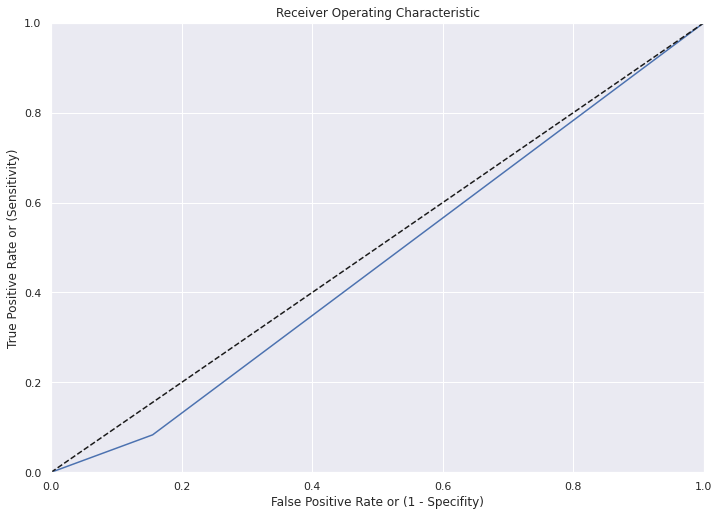

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs')
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)  # Predict
print (y_pred)
evaluate_binary_model(y_test, y_pred)   # Evaluate

### k Nearest Neighbours (acc = 0.65)

AUC is:  0.5097222222222223
              precision    recall  f1-score   support

           0       0.66      0.98      0.79        45
           1       0.50      0.04      0.08        24

    accuracy                           0.65        69
   macro avg       0.58      0.51      0.43        69
weighted avg       0.60      0.65      0.54        69

Confusion Matrix: 
 [[44  1]
 [23  1]]


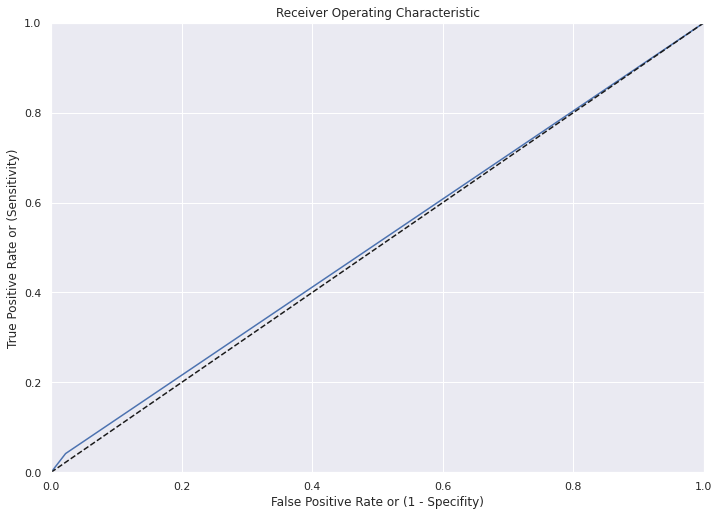

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=40) # Define the model with parameters

model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_binary_model(y_test, y_pred) #evaluate our model using newly defined function